# Data Science Report for NZMSA Phase 3 2022.

# Introduction

    In this report, a deep learning binary classification model was developed. The model is utilized to determine whether the input image is an airplane. Convolutional neural network architecture is the main component of our model. We will present the modelling process and the model performance in the following sections.

# Modelling Process.

    There are 10 class labels in the dataset CIFAR-10. All the labels are shown in the list: [airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]. We pick the first label 'Airplane', and want our model to detect all airplane images from the dataset. 
    We update the original dictionary with adding a new key called "label_airplane." Each image has a corresponding "label airplane" value that is either 1 (if the image is an airplane) or 0 (if the image is some other items or animals). This column will be used as the category label, which is the dependent variable that needs to be predicted by the model. Our model will categorize all the airplane images into class 1 and all the other images into class 0.
    In the testing set, we need to ensure no data imbalance between the images belonging to the label I selected. We found that there were 10,000 images in the given testing set. Each label has 1000 images. Therefore, we select 1000 airplane images from the and randomly choose 1000 images from other items or animals. The shape of our training and testing sets are as follows:
    Shape of X_train set is (10000, 32, 32, 3)
    Shape of Y_train:  (10000,)
    Shape of X_test:  (2000, 32, 32, 3)
    Shape of X_test:  (2000,).
    
    We construct our model using the convolutional neural network (CNN) architecture. A CNN model typically operates in three steps. A convolutional layer extracts the features of the input image in the first stage. A pooling layer will be used in the second stage to reduce the image's dimensionality. After that, data is flattened into one dimension and sent into the completely connected dense layer. Finally, this dense layer does image prediction.

In [2]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('modeltrain')
# summarize model.
model.summary()

2022-09-09 22:21:59.359924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-09 22:21:59.360047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                  

    Our model has two layers of convolutional layers and pooling layers. The final dense layer will make a binary image prediction by setting the number of units equal to 1 with the sigmoid activation function. We also apply hyperparameter tuning to our model to find the best possible model compilation parameters for accuracy. The result is shown as the following figure. Based on the tuning result we choose the following parameters: HP_NUM_UNITS = 128 (number of unit of the first dense layer), HP_DROPOUT = 0.5, HP_OPTIMIZER = adam.

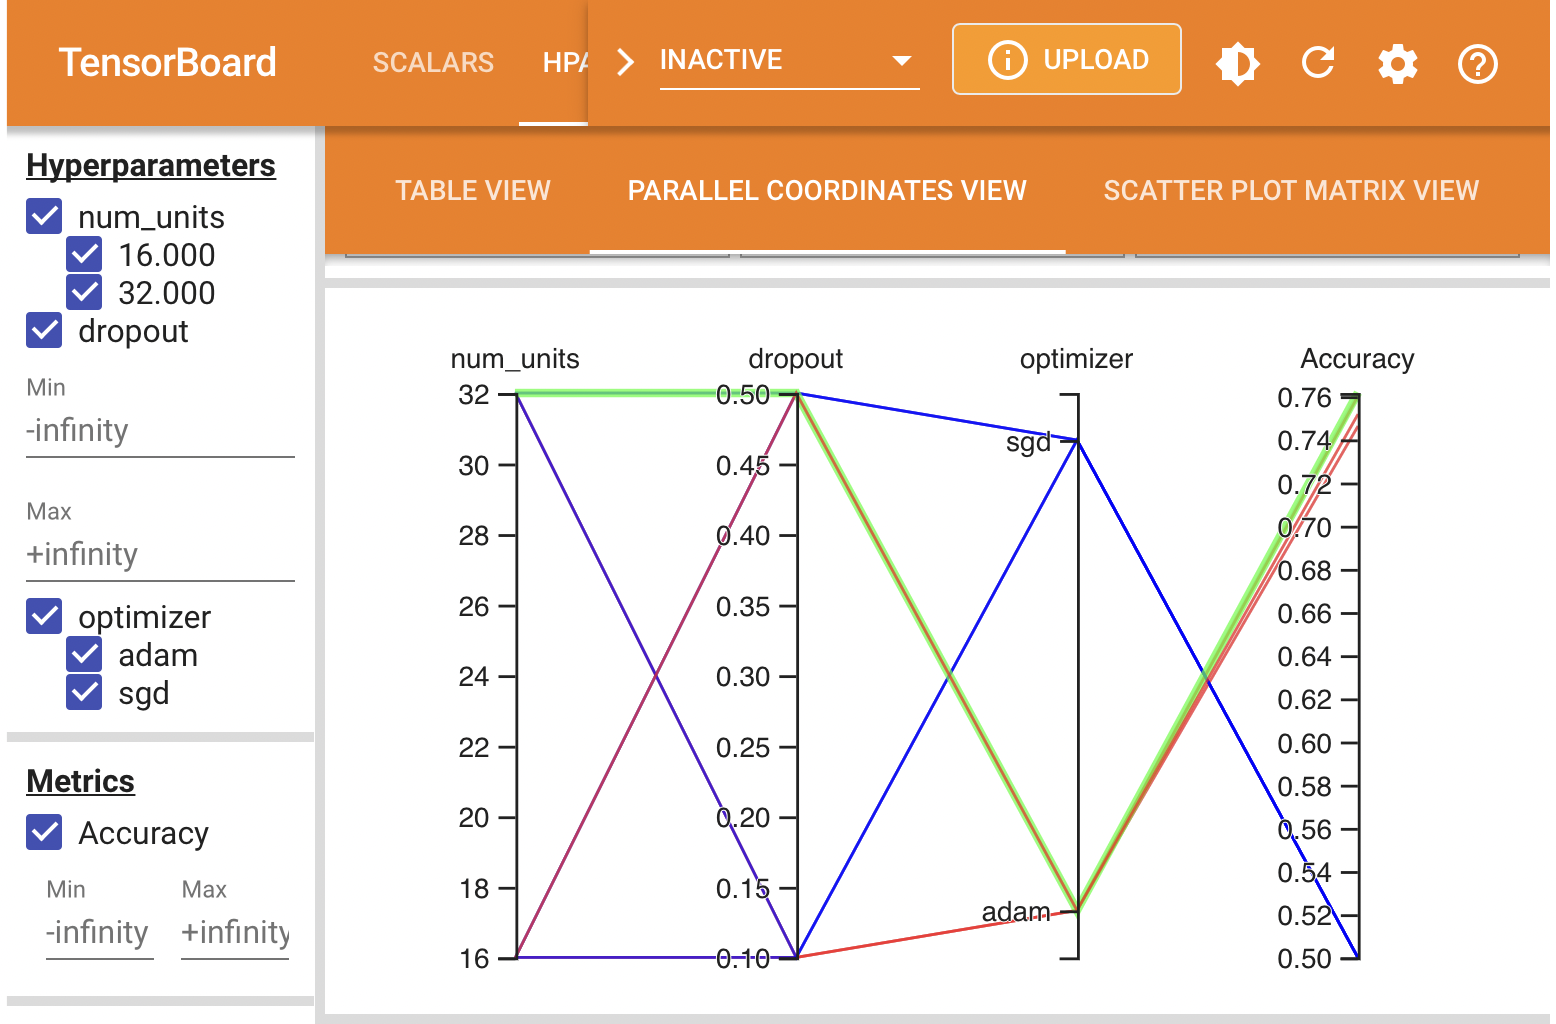

In [3]:
from IPython.display import Image
Image("parameter.png")

# Model Performance.

    We split the training dataset into training and validation sets with a ratio of 0.67: 0.33. The performance is shown in the following two figures, which are obtained from the Tensorboard. 

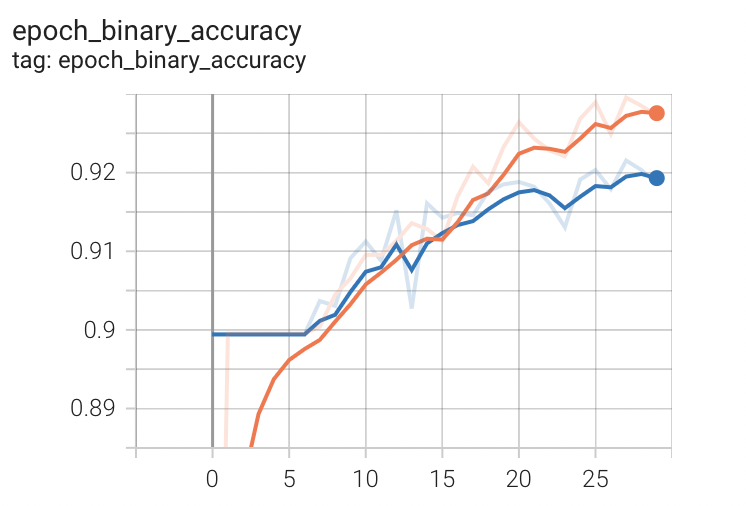

In [4]:
from IPython.display import Image
Image("accuracy.png")

    The first figure above shows the accuracy results of our model. The orange curve represents the training accuracy, and the blue line represents the validation accuracy.  

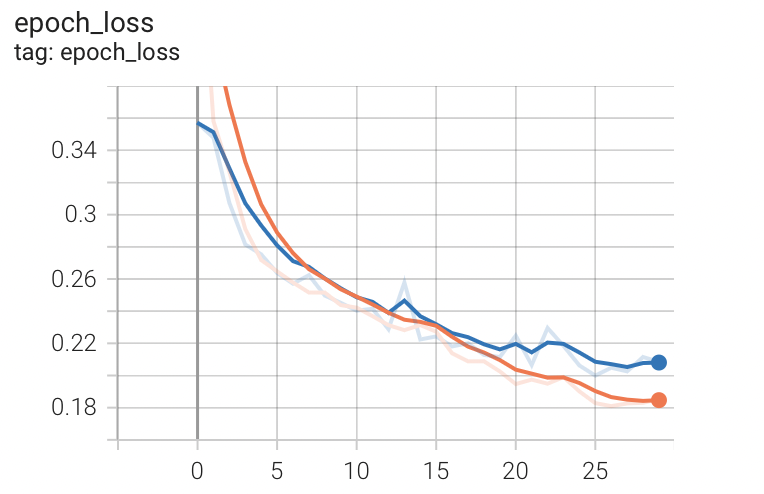

In [5]:
from IPython.display import Image
Image("loss.png")

    The second figure above shows the loss of our model. The orange curve represents the training loss, and the blue line represents the validation loss.  
    
    From these two figures, we can find that both the training and validation accuracy of the model is gradually increasing. In contrast, the loss values of the model are progressively decreasing. This shows that our model has correctly learned the information from the input data. The final training accuracy is close to 0.92 and the final validation is around 0.94. 
    
    We evaluate our model with the testing set. The testing accuracy is 0.74.

# Conclusion

    By applying the convolutional neural network (CNN) architecture, we build a classification model that detects all the airplane images from the dataset. The model has excellent performance of training, validation, and testing accuracy.
    
    We also create two functions to evaluate our model. The functions are named label_prediction_single and 'evluate_images'. The first function, "label_prediction_single" takes a single image as the input and resizes the image to 32x32. The output is the label prediction result of the input image with 1 (representing the image is an airplane) or 0 (representing the image is some other item/animal). We also provide two test images. The image 'test_image1' is an airplane, and the image 'test_image2' is a cat. Our model can correctly label the images. 
    The second function, "evluate_images" takes the directory_path and a label set as the input. The value 'directory_path' is a folder's path containing multiple PNG and/or JPEG images. Our function resizes all images to 32x32 and calls the model evaluation function. The output would be the prediction result of the images, and prediction accuracy is also shown. We also provied a "test_set" file which contions two .jpeg image and one .peng file. The images correspond to the label set [0,1,0]. This function also perform well over the example test set. 



